**Preparation of the dataset**

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("../content/sna.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


The decision tree usually can handle both numerical and categorical features. The treatment of categorical data becomes crucial during the tree-building process. Categorical features have string values. For example, Gender has two levels either Male or Female.

In this case we have an error saying that it cannot convert string to float. In So learners like logistic regression, distance based methods such as kNN, support vector machines, tree based methods etc. in sklearn needs numeric arrays. **Features having string values cannot be handled by these learners.**

We can use two strategies
* Label Encoding
* One-Hot Encoding

Label encoding involves converting categorical data into numerical format by assigning a distinct integer label to each category or class.

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [8]:
data = data[['Gender', 'Age', 'EstimatedSalary', 'Purchased']]

In [9]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [10]:
data.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

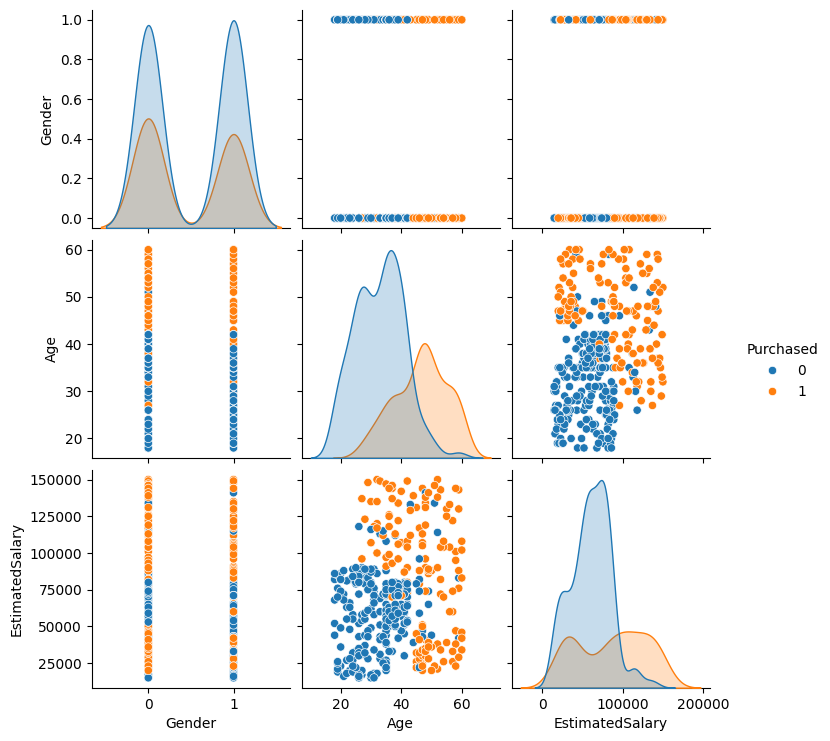

In [12]:
sns.pairplot(data=data, hue='Purchased')
plt.show()

# Test and Training sets


In [13]:
X = data.drop(['Purchased'], axis=1)

In [14]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [15]:
y = data['Purchased']

In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [17]:
y.value_counts(normalize=True)

Purchased
0    0.6425
1    0.3575
Name: proportion, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [19]:
y_train.value_counts(normalize=True)

Purchased
0    0.646667
1    0.353333
Name: proportion, dtype: float64

**Model**

In [20]:
from sklearn.tree import DecisionTreeClassifier
model_01 = DecisionTreeClassifier()
model_01.fit(X_train, y_train)

DecisionTreeClassifier()

**Prediction**

In [21]:
pred = model_01.predict(X_test)
pred[:5]

array([1, 1, 0, 1, 0])

In [22]:
model_01.predict(pd.DataFrame({'Gender':[1], 'Age':[30], 'EstimatedSalary':[77000]}))

array([0])

**Evaluation**

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[55,  8],
       [ 6, 31]])

In [24]:
confusion_matrix(pred,y_test)

array([[55,  6],
       [ 8, 31]])

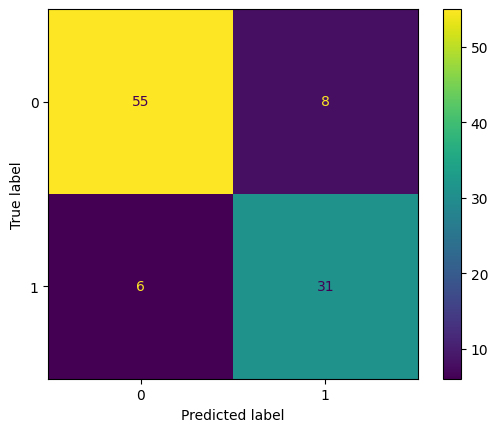

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, labels=model_01.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_01.classes_)
disp.plot()
plt.show()

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.86

In [27]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

In [28]:
tn

np.int64(55)

# Visualizations

[Text(0.5060975609756098, 0.9666666666666667, 'Age <= 42.5\ngini = 0.457\nsamples = 300\nvalue = [194.0, 106.0]'),
 Text(0.2682926829268293, 0.9, 'EstimatedSalary <= 90500.0\ngini = 0.289\nsamples = 217\nvalue = [179, 38]'),
 Text(0.3871951219512195, 0.9333333333333333, 'True  '),
 Text(0.1951219512195122, 0.8333333333333334, 'Age <= 36.5\ngini = 0.074\nsamples = 182\nvalue = [175, 7]'),
 Text(0.17073170731707318, 0.7666666666666667, 'gini = 0.0\nsamples = 121\nvalue = [121, 0]'),
 Text(0.21951219512195122, 0.7666666666666667, 'EstimatedSalary <= 83500.0\ngini = 0.203\nsamples = 61\nvalue = [54, 7]'),
 Text(0.1951219512195122, 0.7, 'EstimatedSalary <= 67500.0\ngini = 0.18\nsamples = 60\nvalue = [54, 6]'),
 Text(0.17073170731707318, 0.6333333333333333, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.21951219512195122, 0.6333333333333333, 'Age <= 41.5\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.14634146341463414, 0.5666666666666667, 'EstimatedSalary <= 70500.0\ngini = 0

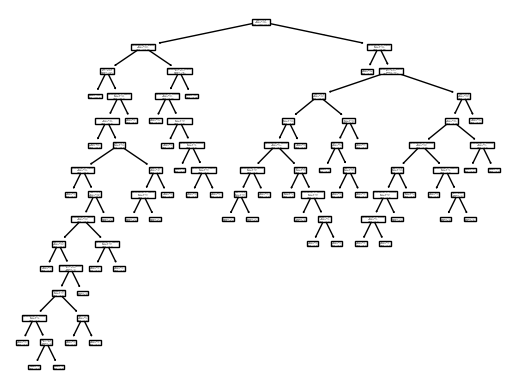

In [29]:
from sklearn import tree
#from matplotlib import pyplot as plt
features = ['Gender', 'Age', 'EstimatedSalary']
tree.plot_tree(model_01, feature_names=features)

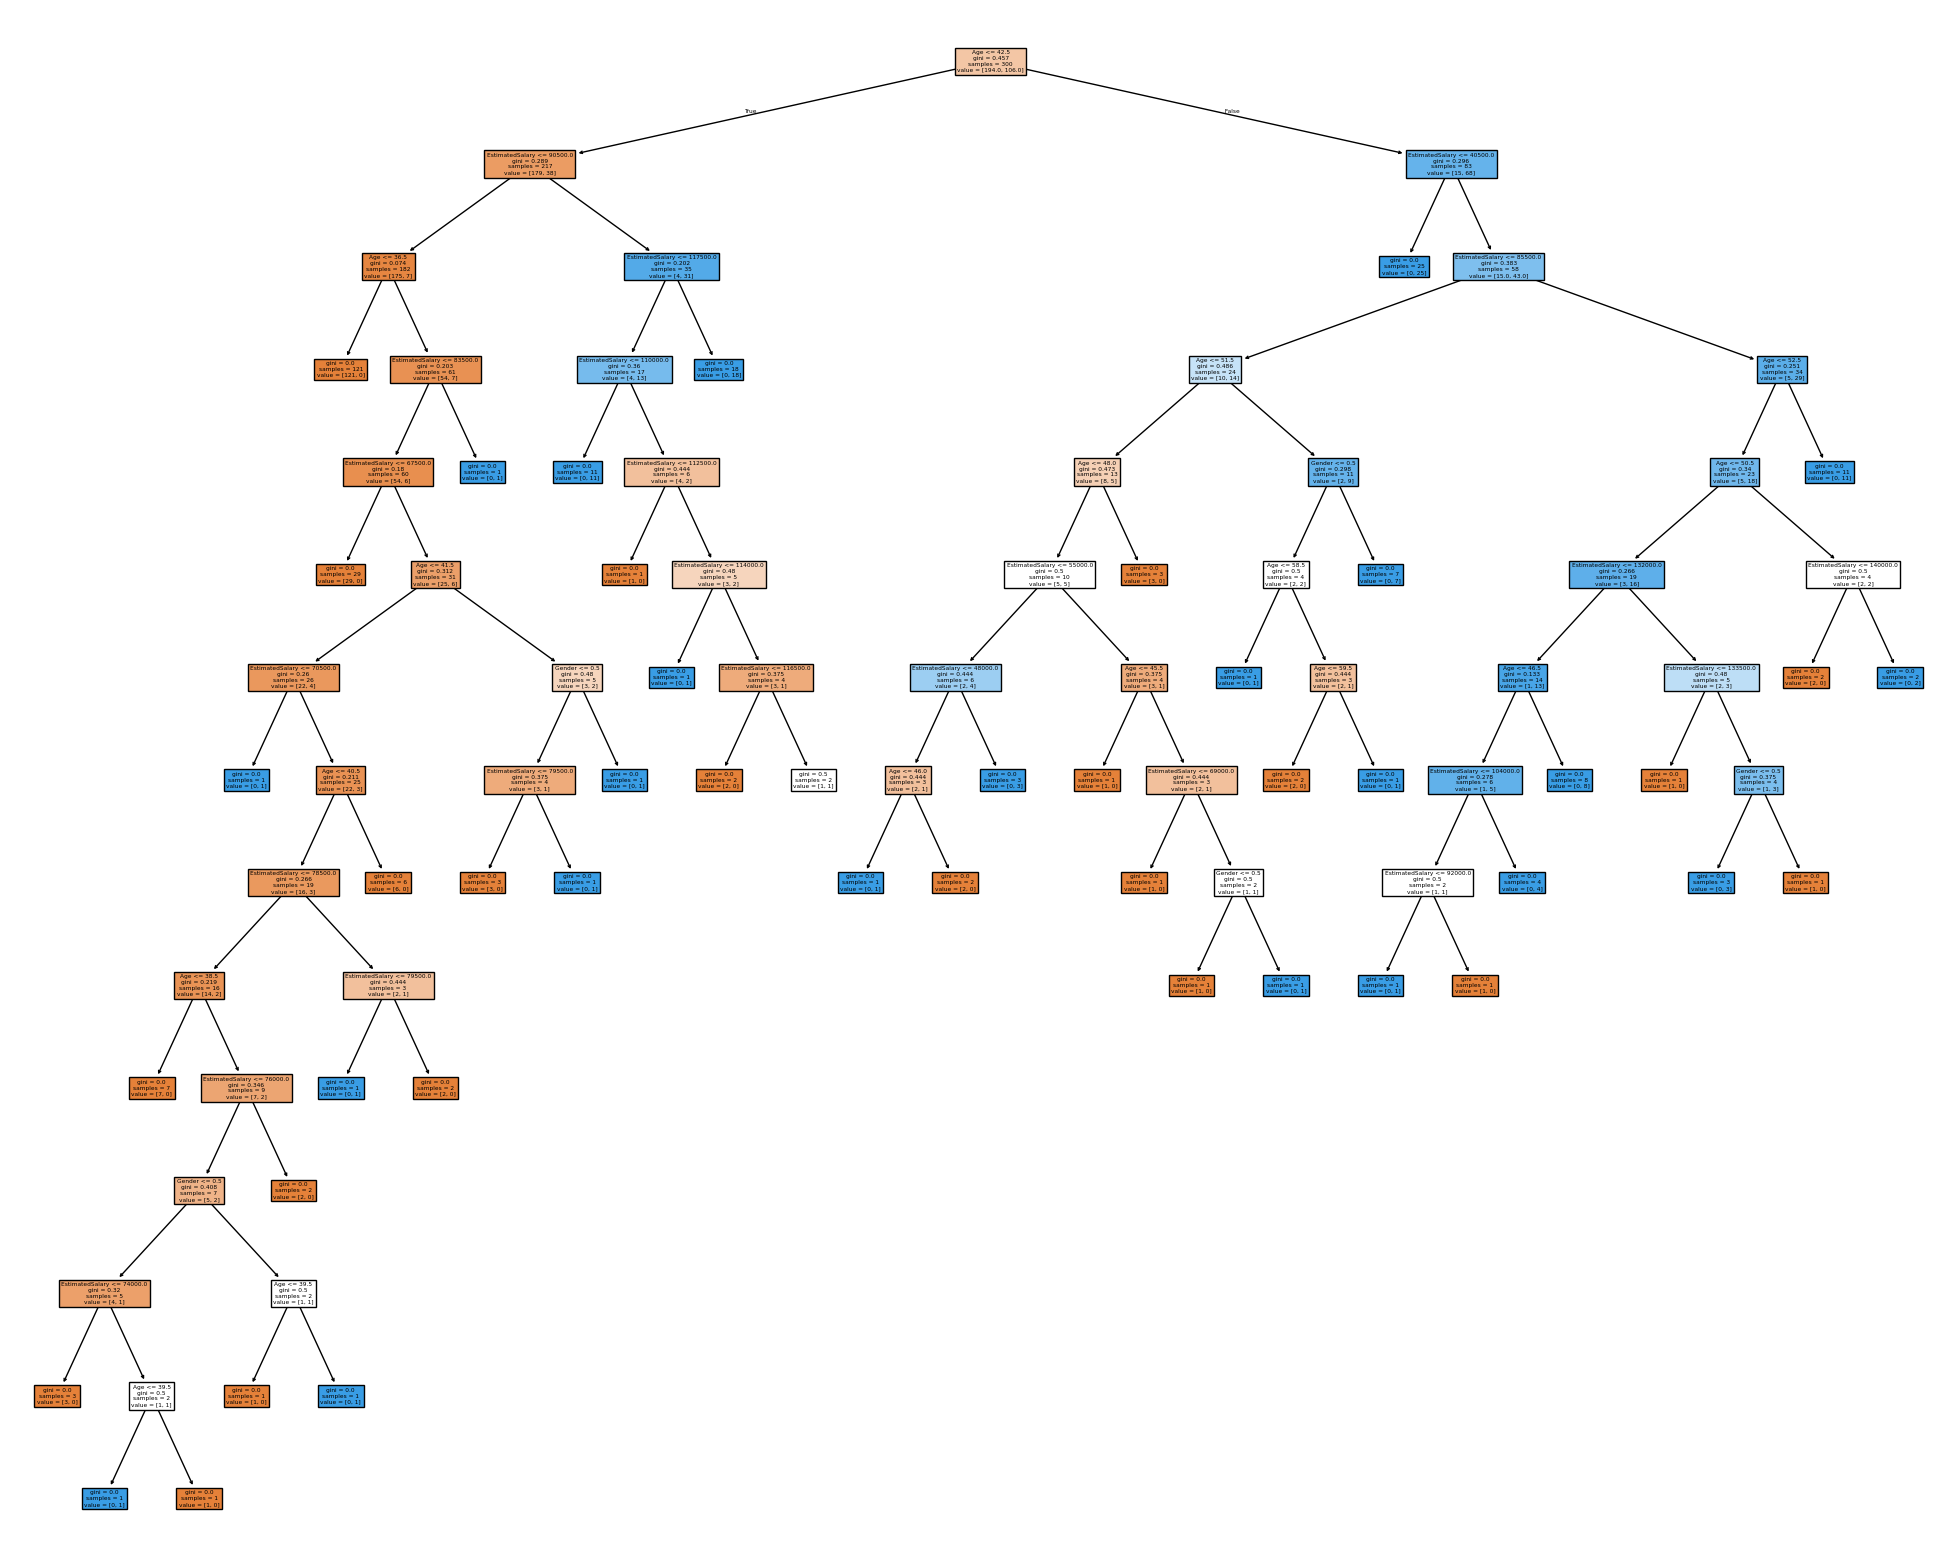

In [30]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_01,
                   feature_names=features,
                   filled=True)

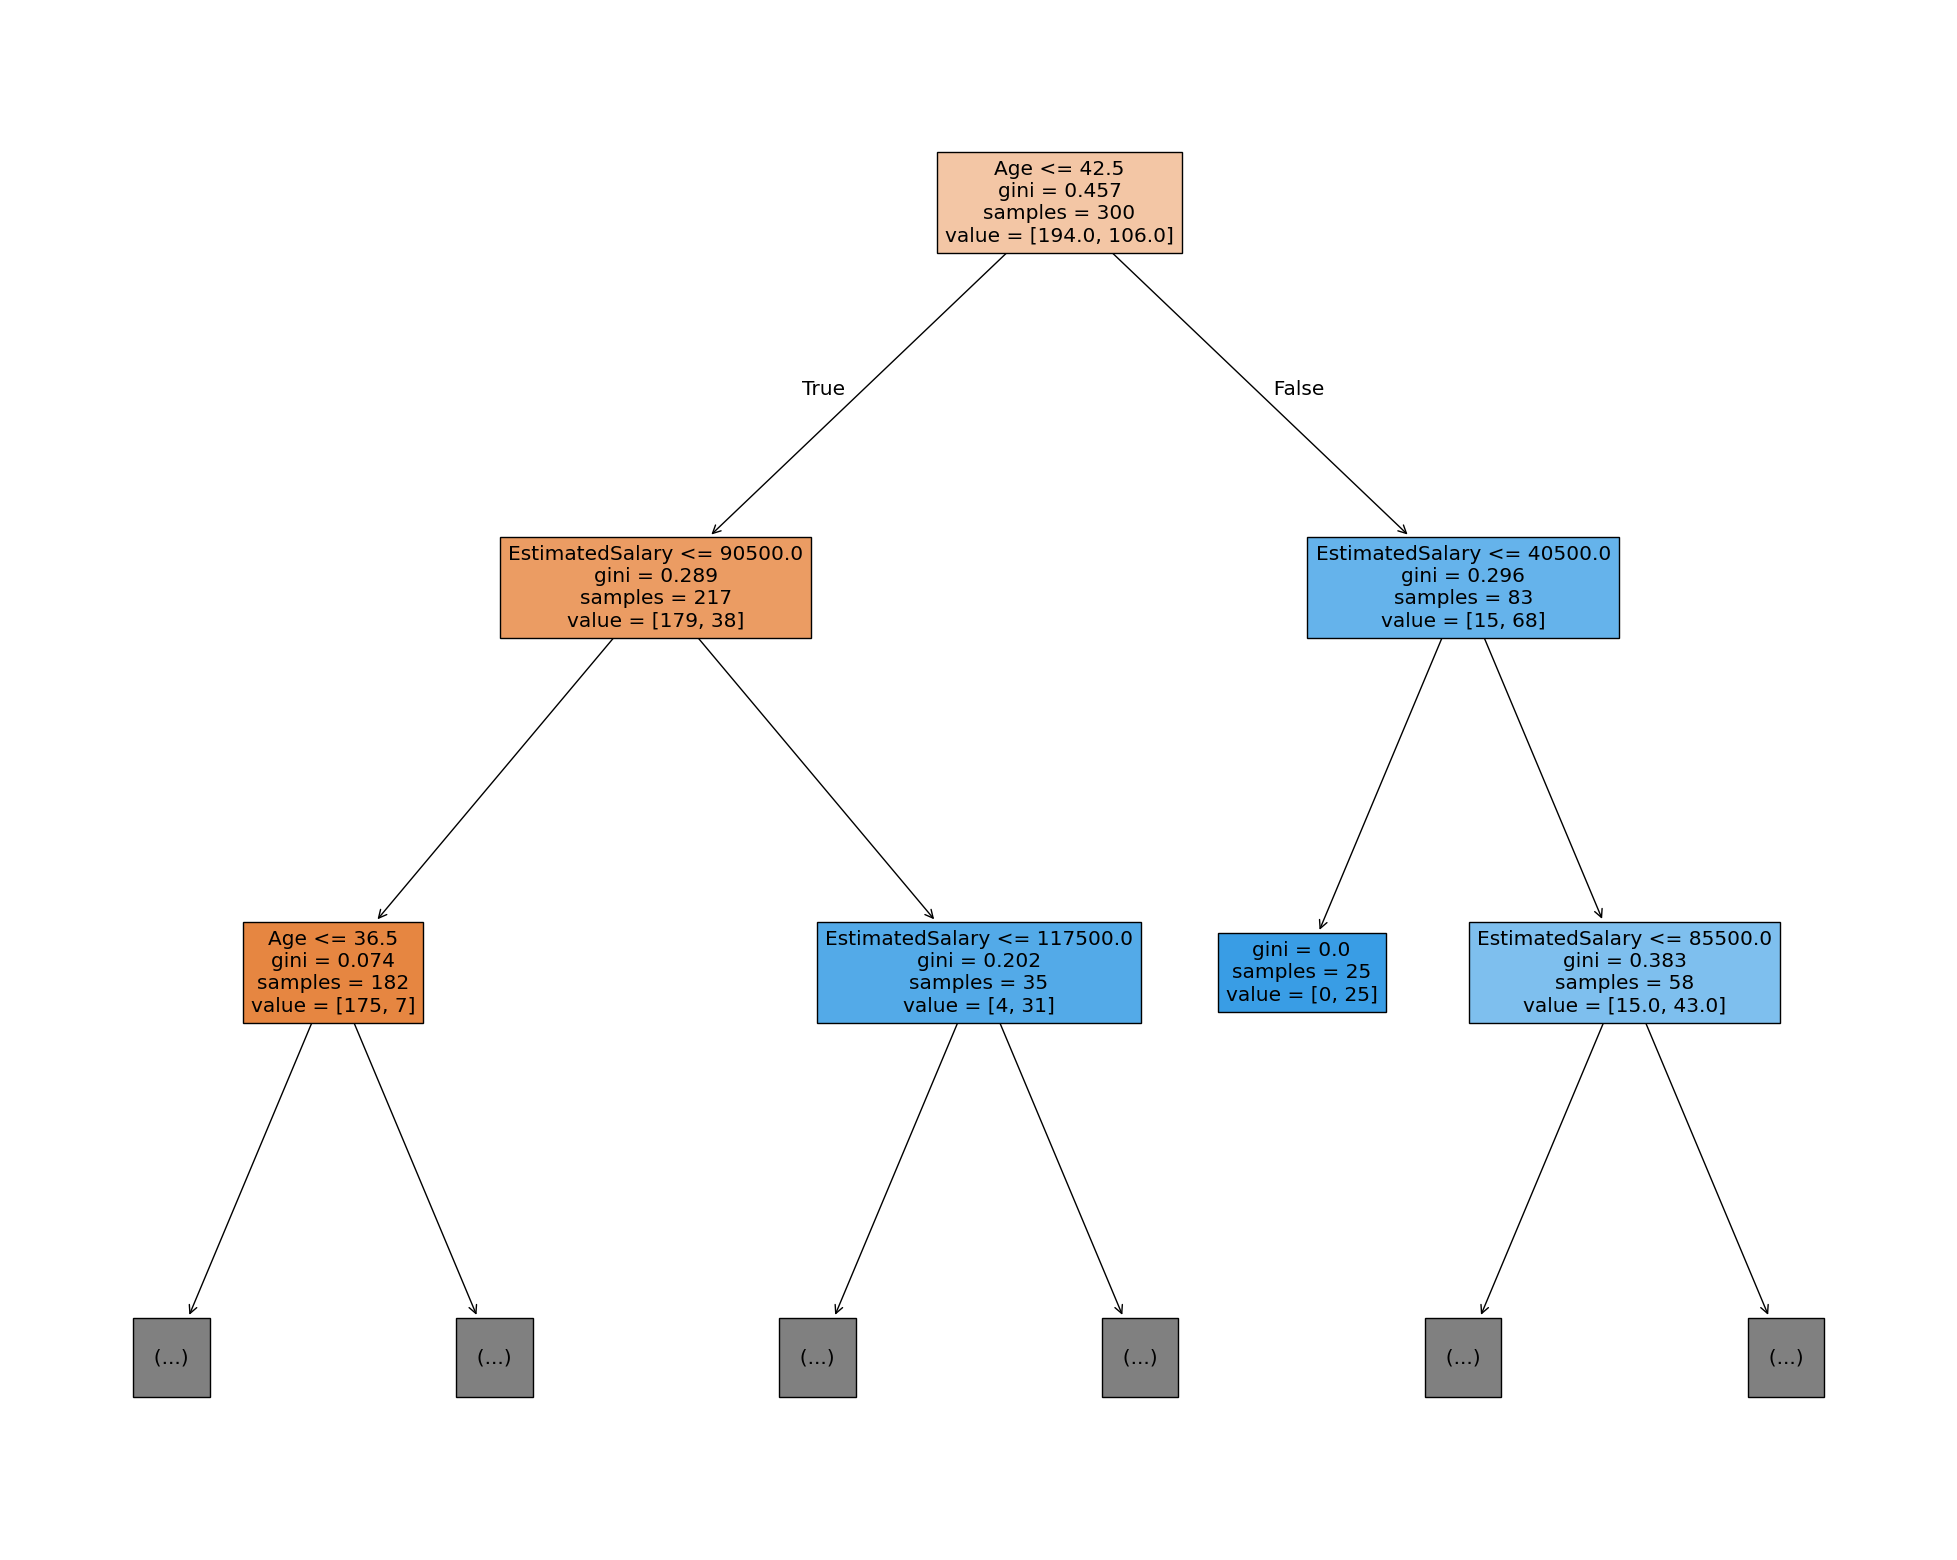

In [31]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_01,
                   feature_names=features,
                   max_depth=2,
                   filled=True)

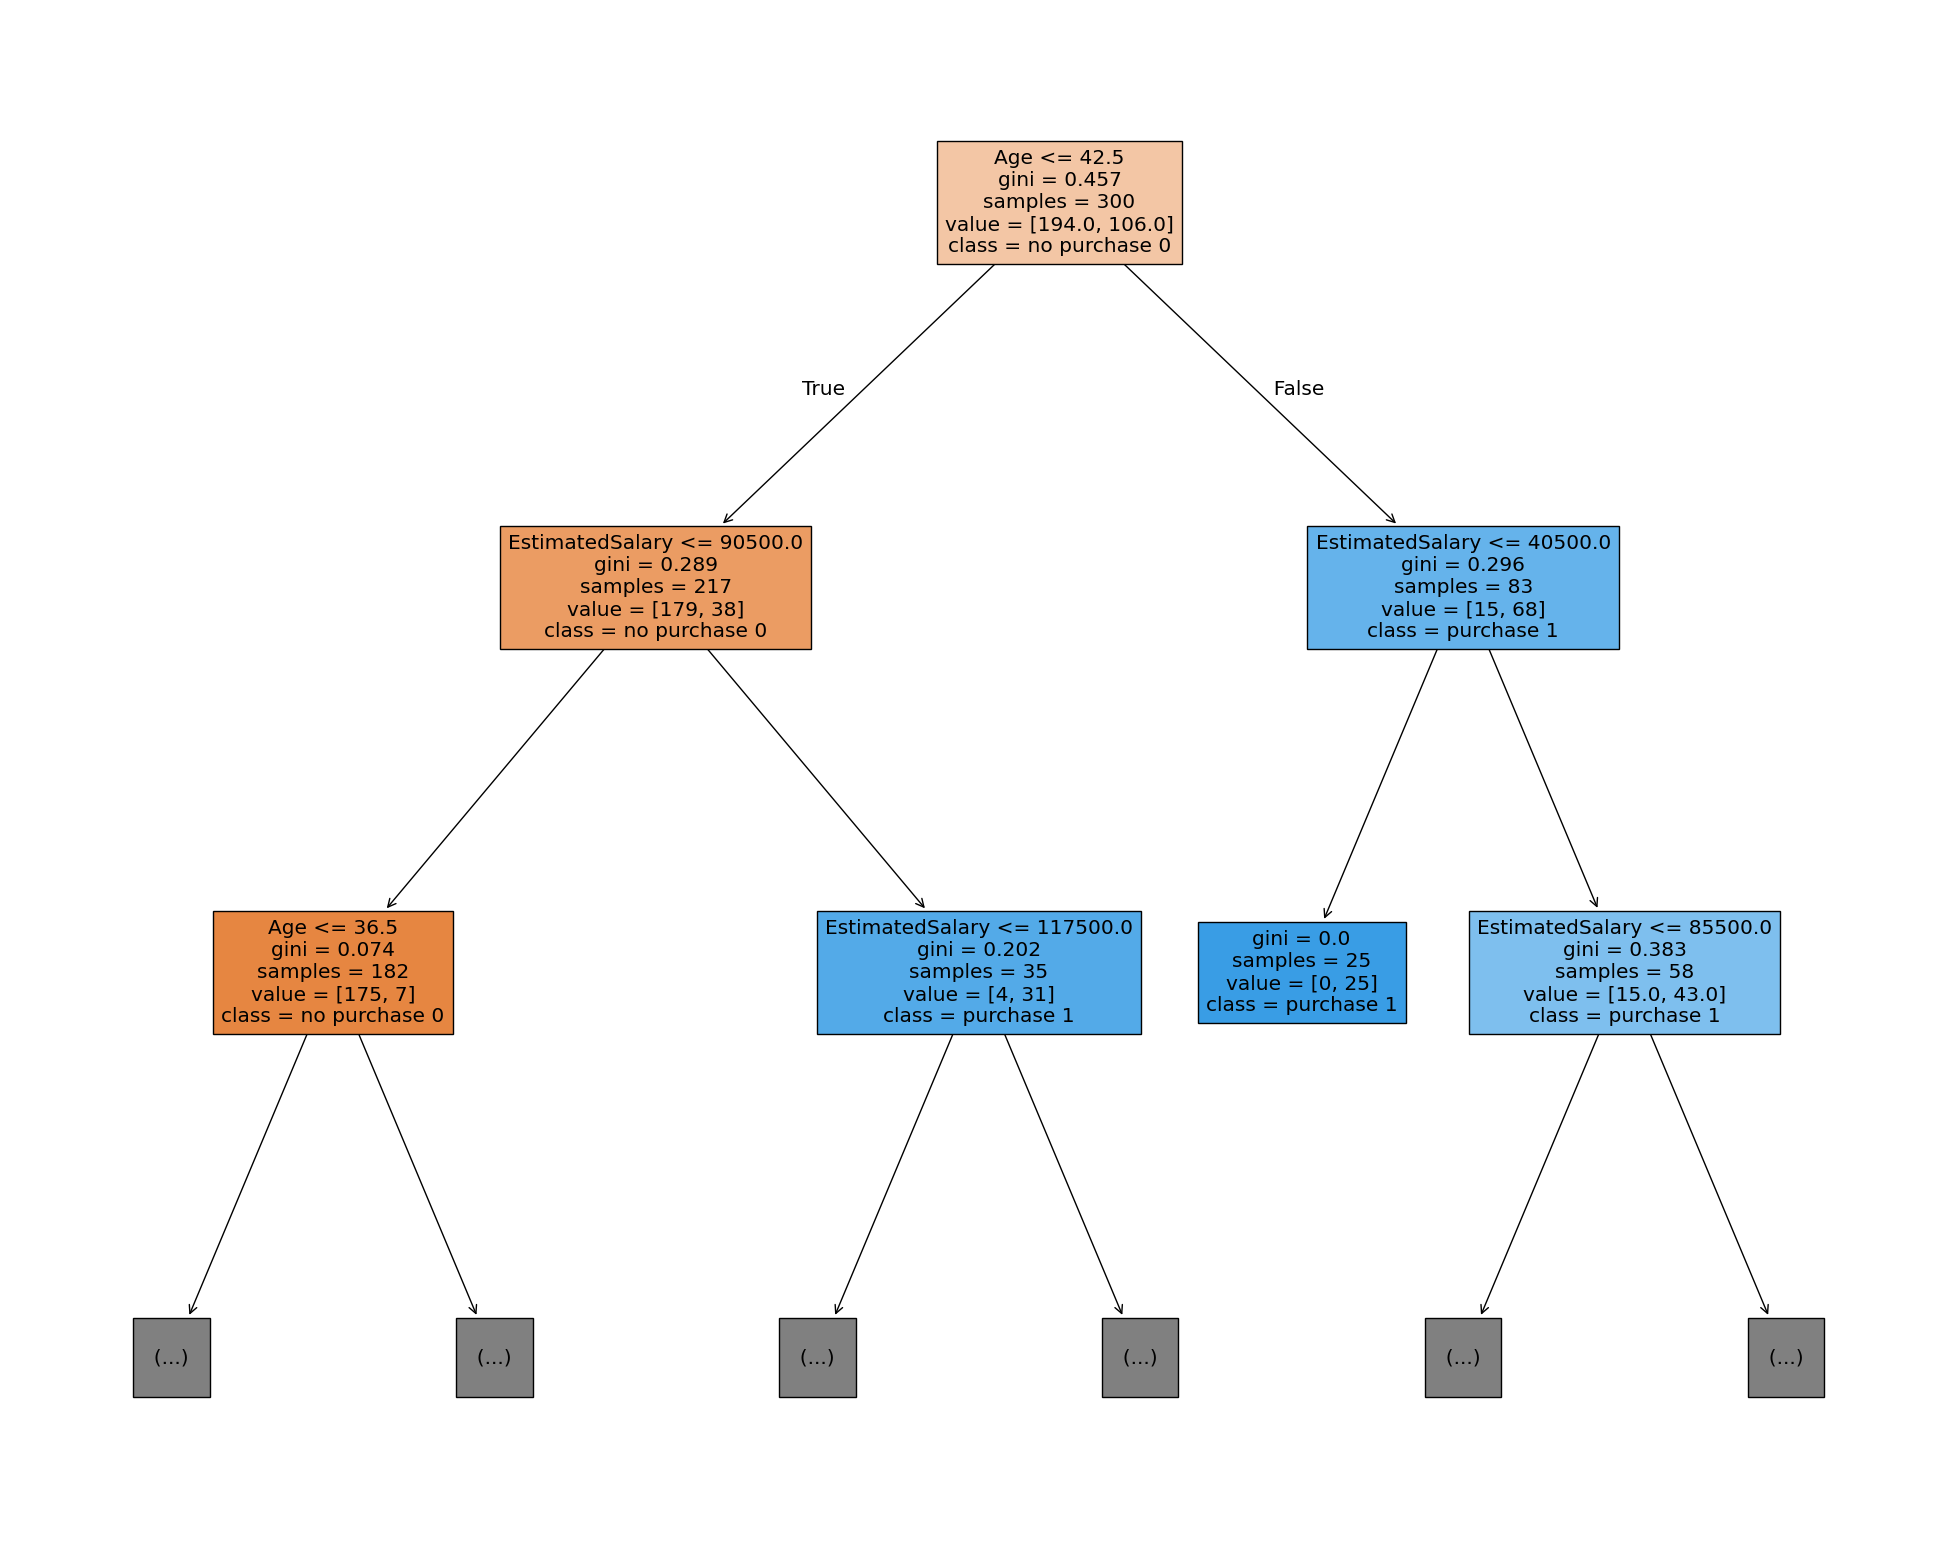

In [32]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_01,
                   feature_names=features,
                   class_names = ['no purchase 0', 'purchase 1'],
                   max_depth=2,
                   filled=True)

In [33]:
text_tree = tree.export_text(model_01,
                                         feature_names=features,
                                         max_depth=2)
print(text_tree)

|--- Age <= 42.50
|   |--- EstimatedSalary <= 90500.00
|   |   |--- Age <= 36.50
|   |   |   |--- class: 0
|   |   |--- Age >  36.50
|   |   |   |--- truncated branch of depth 12
|   |--- EstimatedSalary >  90500.00
|   |   |--- EstimatedSalary <= 117500.00
|   |   |   |--- truncated branch of depth 5
|   |   |--- EstimatedSalary >  117500.00
|   |   |   |--- class: 1
|--- Age >  42.50
|   |--- EstimatedSalary <= 40500.00
|   |   |--- class: 1
|   |--- EstimatedSalary >  40500.00
|   |   |--- EstimatedSalary <= 85500.00
|   |   |   |--- truncated branch of depth 7
|   |   |--- EstimatedSalary >  85500.00
|   |   |   |--- truncated branch of depth 7




[Model parameters](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [34]:
model_01.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [35]:
model_02=DecisionTreeClassifier(criterion="entropy",random_state=100, max_depth=3)
model_02.fit(X_train, y_train)
pred2 = model_02.predict(X_test)

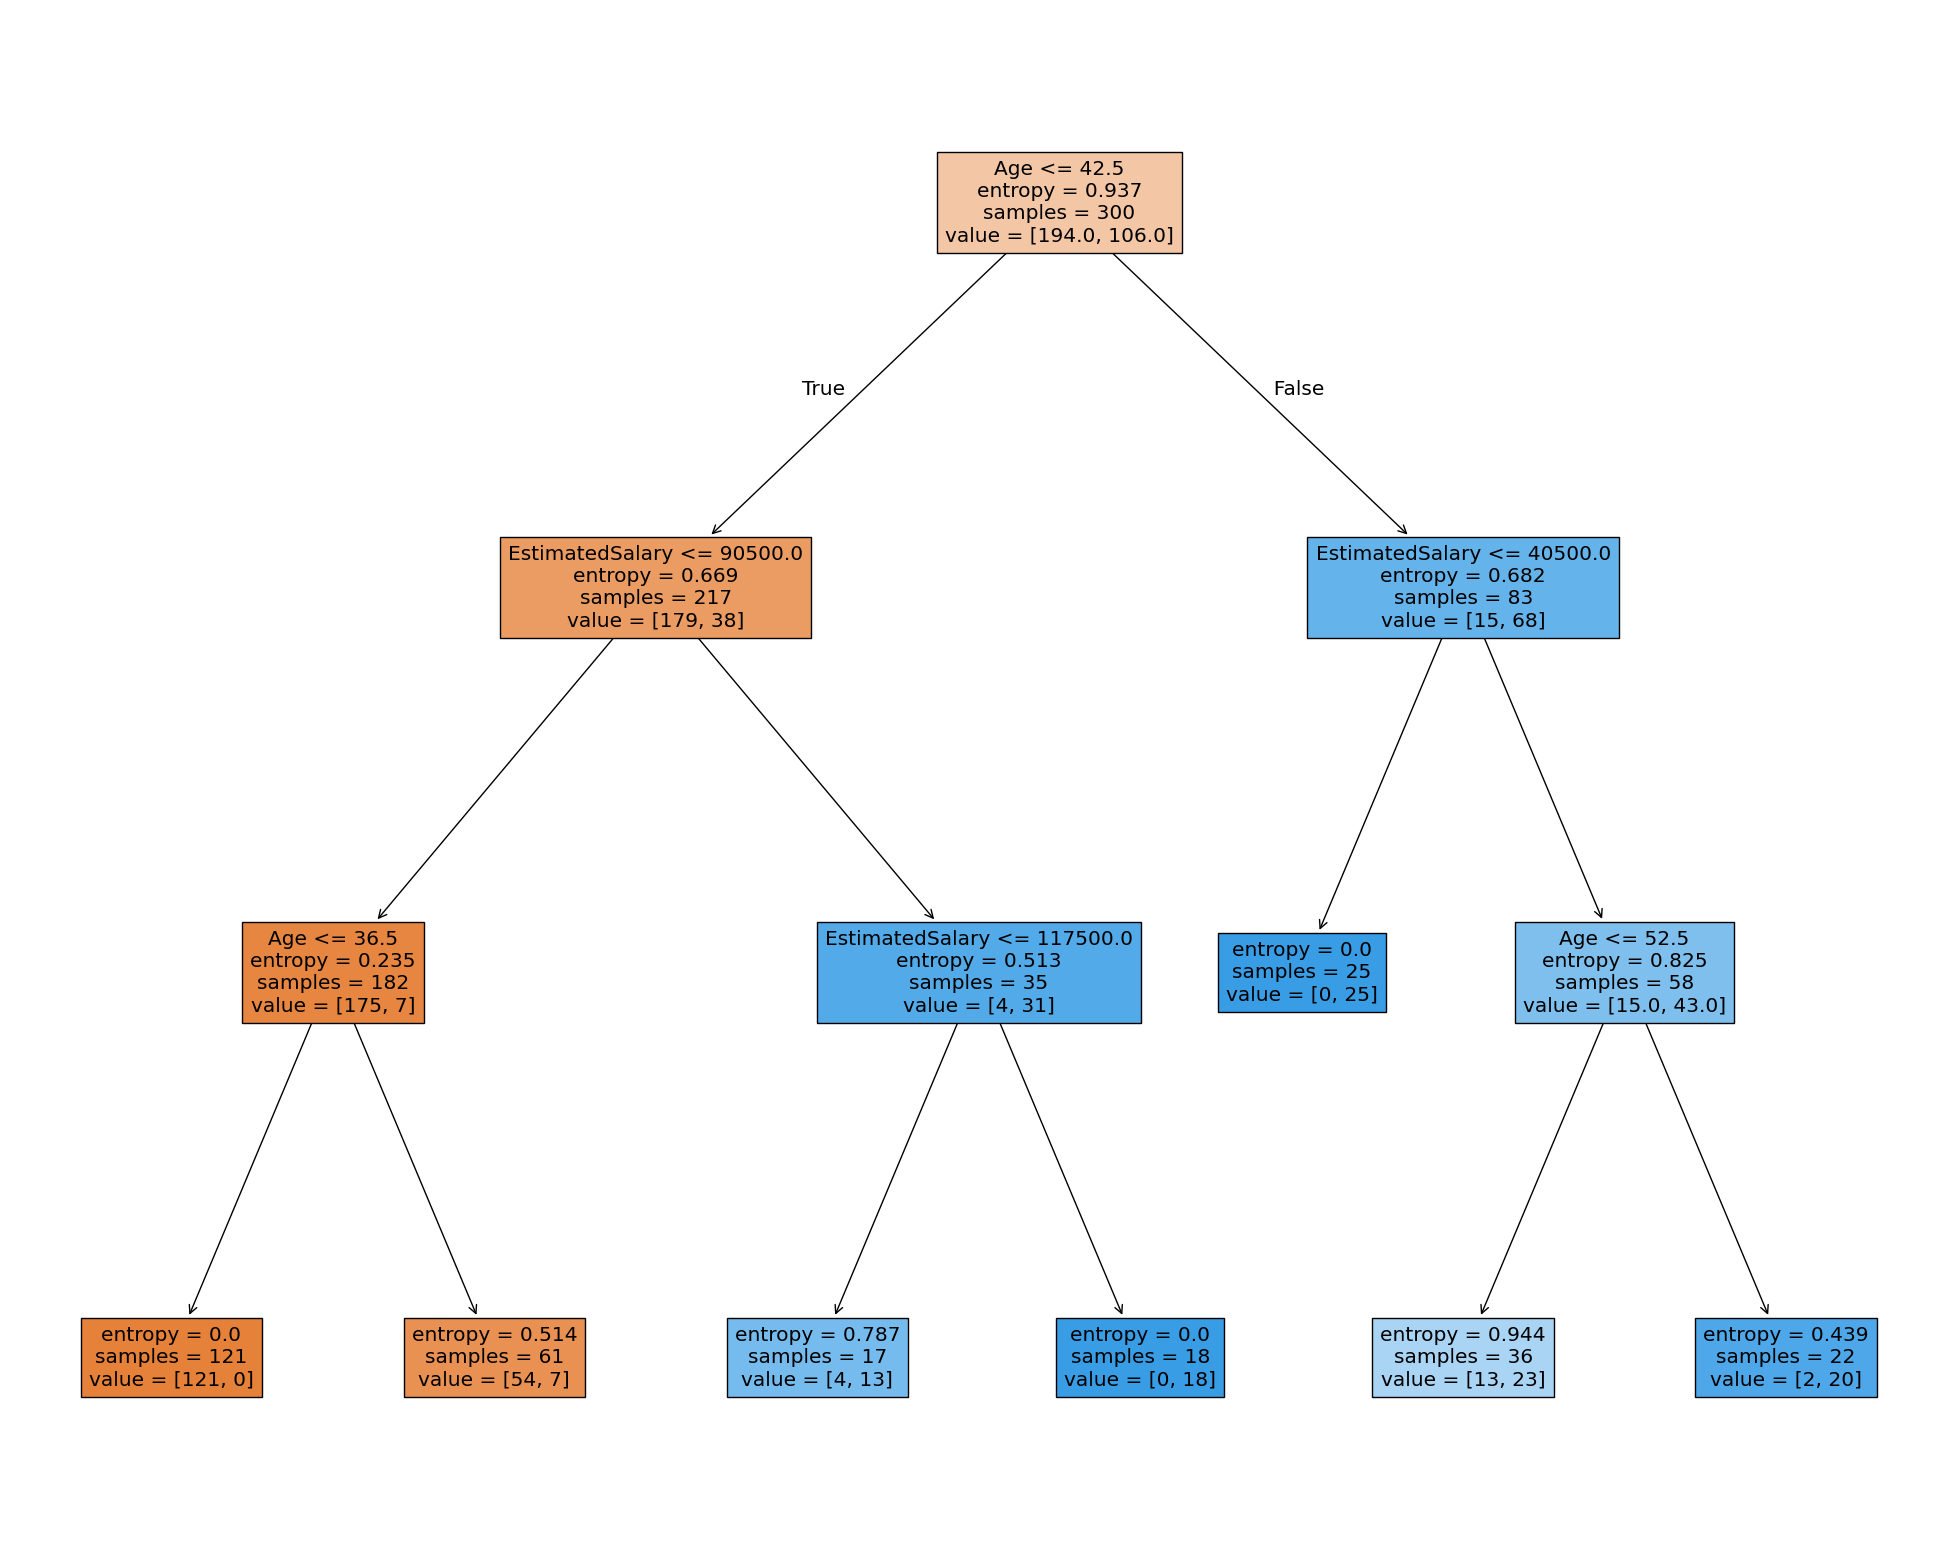

In [36]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_02,
                   feature_names=features,
                   filled=True)

In [37]:
confusion_matrix(y_test, pred2)

array([[57,  6],
       [ 2, 35]])

In [38]:
accuracy_score(y_test, pred2)

0.92

In [39]:
pred1_train = model_02.predict(X_train)
accuracy_score(y_train, pred1_train)

0.9133333333333333

In [40]:
pred_train = model_01.predict(X_train)
accuracy_score(y_train, pred_train)

0.9966666666666667

Find observations in the leaf
 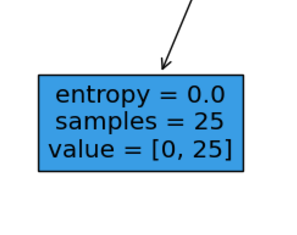

In [41]:
leaf1=data.loc[(data.Age > 42.5) & (data.EstimatedSalary <= 40500.00)]
leaf1

,Gender,Age,EstimatedSalary,Purchased
16,1,47,25000,1
17,1,45,26000,1
18,1,46,28000,1
19,0,48,29000,1
20,1,45,22000,1
23,0,45,22000,1
24,1,46,23000,1
25,1,47,20000,1
26,1,49,28000,1
27,0,47,30000,1


In [42]:
df=X_train.copy()
df['Purchased']=y_train
df

,Gender,Age,EstimatedSalary,Purchased
247,0,57,122000,1
110,0,39,71000,0
16,1,47,25000,1
66,1,24,19000,0
153,0,36,50000,0
...,...,...,...,...
71,0,24,27000,0
106,0,26,35000,0
270,0,43,133000,0
348,1,39,77000,0


In [43]:
leaf1=df.loc[(df.Age > 42.5) & (df.EstimatedSalary <= 40500.00)]
leaf1

,Gender,Age,EstimatedSalary,Purchased
16,1,47,25000,1
19,0,48,29000,1
355,1,60,34000,1
292,1,55,39000,1
386,0,49,39000,1
17,1,45,26000,1
24,1,46,23000,1
375,0,46,32000,1
23,0,45,22000,1
283,0,52,21000,1


In [44]:
leaf1.shape

(25, 4)

Importance of variables

In [45]:
model_02.feature_importances_

array([0.        , 0.49257243, 0.50742757])

Text(0, 0.5, 'Variable')

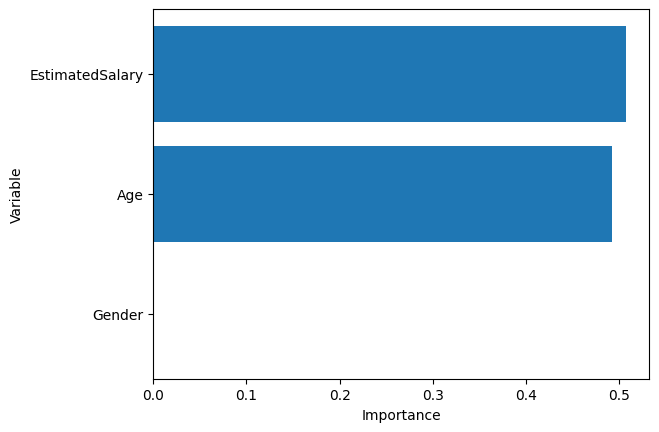

In [46]:
import numpy as np

plt.barh(range(3), list(model_02.feature_importances_), align='center')
plt.yticks(np.arange(3), features)
plt.xlabel("Importance")
plt.ylabel("Variable")